In [1]:
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions




In [2]:
from sklearn.datasets import make_moons

#generate dataset of 100 samples, with noise 0.25 and random state 2
X, y = make_moons(n_samples=100, noise=0.25, random_state=47)


In [6]:
X.shape

(100, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

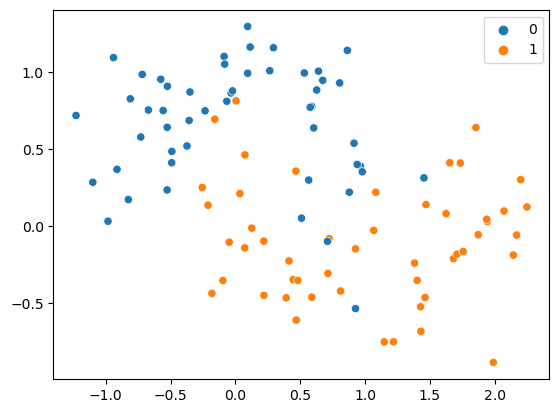

In [3]:
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show
#Use scatter function to plot your dataset


In [12]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam 


# CNN model with hidden layer neuron 128 in first and second layer keep you model name as model1 

model1 = Sequential()

model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='softmax'))


model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compilr the model keeping learning rate 0.01 and train it with 500 epochs validation split 20% verbose 0
from sklearn.model_selection import train_test_split
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 538us/step


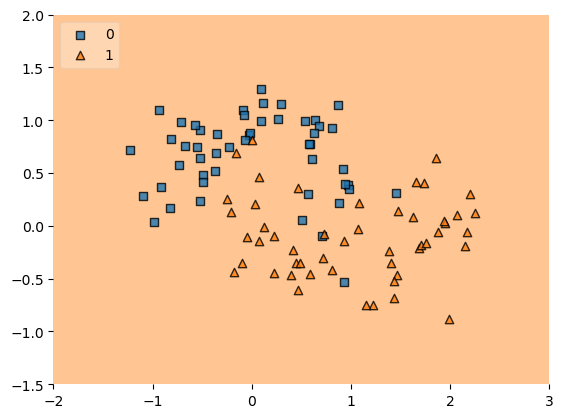

In [20]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

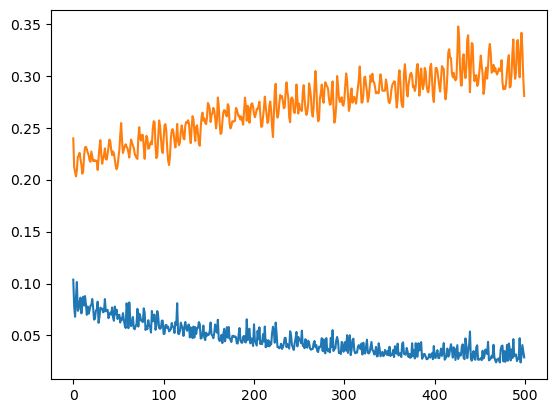

In [21]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [35]:
#Copy you nn model here but this time you have to add the rgulizers l2 with value on your choice
# you can take help from the link https://keras.io/api/layers/core_layers/dense/
#Keep Your model name as model 2
from keras.regularizers import l2

model2 = Sequential()


model2.add(Dense(128, activation='relu',kernel_regularizer=l2(0.005)))
model2.add(Dense(128, activation='relu',kernel_regularizer=l2(0.005)))
model2.add(Dense(1, activation='softmax',kernel_regularizer=l2(0.005)))


model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compilr the model keeping learning rate 0.01 and train it with 2000 epochs validation split 20% verbose 0
from sklearn.model_selection import train_test_split
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2000, verbose=0)


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 556us/step


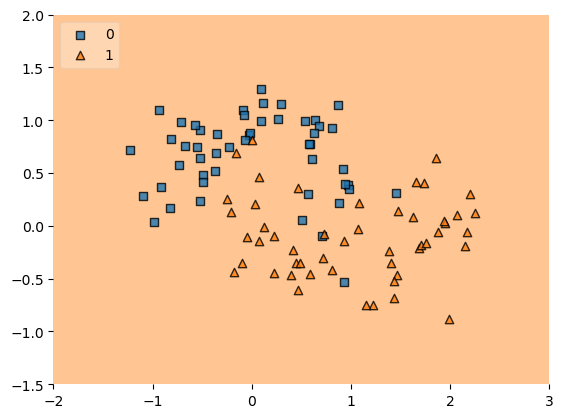

In [37]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

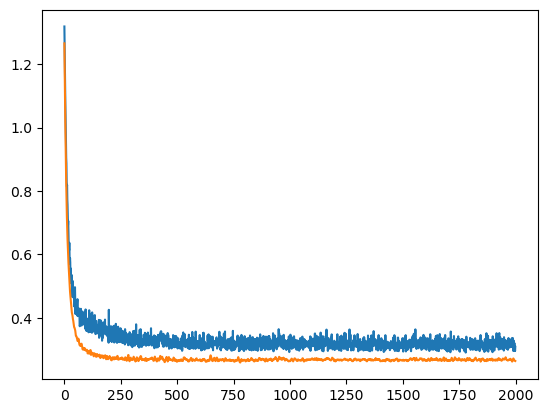

In [38]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [39]:
#You can compare the weight of first layer of both model print that and observe the weight values
model1_weight_layer1 = model1.get_weights()[0]
model2_weight_layer1 = model2.get_weights()[0]


In [40]:
#print the min value of both model
print(np.min(model1_weight_layer1))
print(np.min(model2_weight_layer1))

-0.83832926
-0.57893884


C:\Users\PC-36\AppData\Local\Temp\ipykernel_7640\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\PC-36\AppData\Local\Temp\ipykernel_7640\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

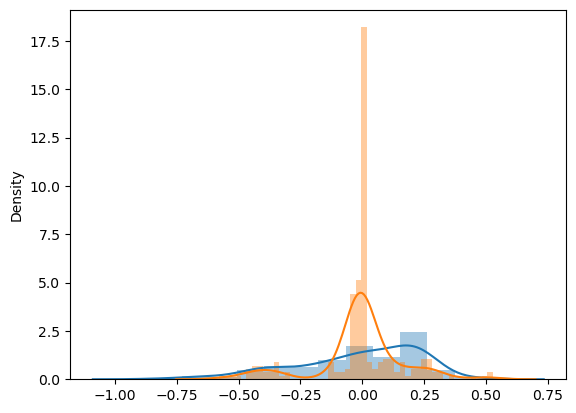

In [41]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)